# **AtliQ Hospitality Analysis**

# Problem Statement
Atliq Grands owns multiple five-star hotels across India. They have been in the hospitality
industry for the past 20 years.
 Due to strategic moves from other competitors and ineffective
decision-making in management, Atliq Grands are losing its market share and revenue in the
luxury/business hotels category. As a strategic move, the managing director of Atliq Grands
wanted to incorporate “Business and Data Intelligence” in order to regain their market share
and revenue.

However, they do not have an in-house data analytics team to provide them with these
insights. Their revenue management team had decided to hire a 3rd party service provider to
provide them with insights from their historical data.

## Case Study

Filters by properties, city, status, platform, month and week.

Revenue, Occupancy % and Average rating cards.

Split by City, Property by key metrics.

Trends by week, Occupancy by day type, Booking % by platform.

## Here's a concise summary of the six Atliq hotel datasets:

dimdate: Contains date, month-year, week number, and day type for time analysis.

dimhotel: Details about each hotel property, including ID, name, category, and city.

dimroom: Information on room types, including ID and class.

fact_aggregated_booking: Aggregated booking data, covering property ID, check-in date, room category, bookings, and capacity.

fact_booking: Detailed booking data, including booking ID, dates, guests, room category, platform, ratings, status, and revenue.

metrics: Metadata with additional information for analysis.








### Task 1 - Load and study the data

In [ ]:
# Load "numpy" and "pandas" for manipulating numbers and data frames
# Load "matplotlib.pyplot" and "seaborn" for data visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dimdate dataset
dimdate = pd.read_csv('/content/dim_date.csv')


In [ ]:
# Take a brief look at the data
dimdate.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [ ]:
# Get the column names of the dataframe
dimdate.columns

Index(['date', 'mmm yy', 'week no', 'day_type'], dtype='object')

In [ ]:
# Extract month and year
dimdate['Month'] = pd.to_datetime(dimdate['date']).dt.month
dimdate['Year'] = pd.to_datetime(dimdate['date']).dt.year

<ipython-input-7-682efba6fa7d>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dimdate['Month'] = pd.to_datetime(dimdate['date']).dt.month
<ipython-input-7-682efba6fa7d>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dimdate['Year'] = pd.to_datetime(dimdate['date']).dt.year


In [ ]:
# Aggregating booking counts by year and month
date_agg = dimdate.groupby(['Year', 'Month']).size().reset_index(name='Booking Count')


# dimdate

TASK:- How does booking volume vary by month and year?

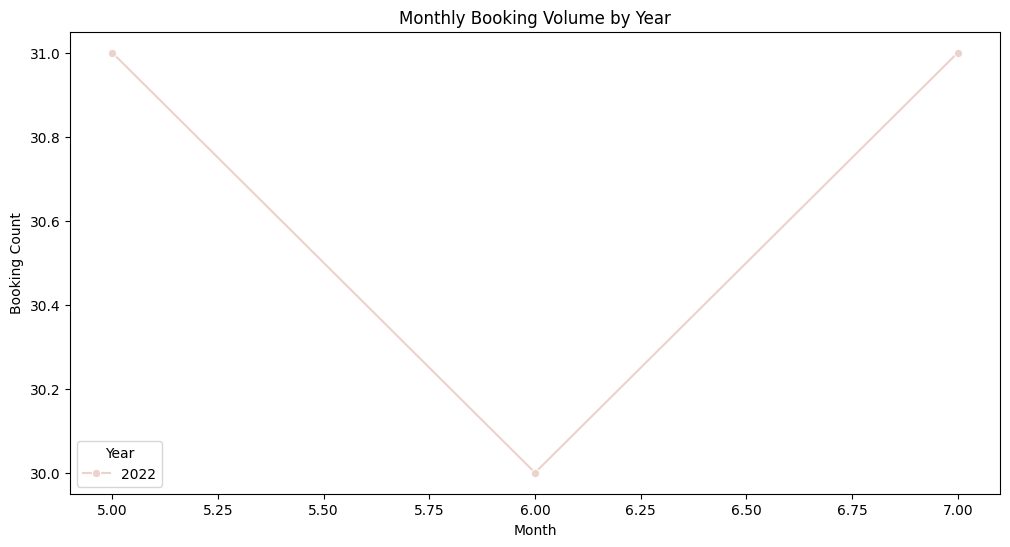

In [ ]:
# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=date_agg, x='Month', y='Booking Count', hue='Year', marker='o')
plt.title('Monthly Booking Volume by Year')
plt.xlabel('Month')
plt.ylabel('Booking Count')
plt.legend(title='Year')
plt.show()

**The line graph displays the monthly booking volume for a hotel in the year 2022. Booking volume peaks in May and declines steadily until June, reaching its lowest point in June. It then experiences a gradual upward trend, ending the year with a slightly higher volume in December than in May. This data can be useful for hoteliers to understand seasonal demand patterns and optimize pricing and marketing strategies accordingly.**

# dimhotel

In [ ]:
# Load the dimhotel dataset
dimhotel = pd.read_csv('/content/dim_hotels.csv')

In [ ]:
dimhotel.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [ ]:
dimhotel.columns

Index(['property_id', 'property_name', 'category', 'city'], dtype='object')

### TASK:- What is the distribution of hotels by star rating and city?

<ipython-input-13-2556374fc8bf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dimhotel, x='category', palette='viridis')


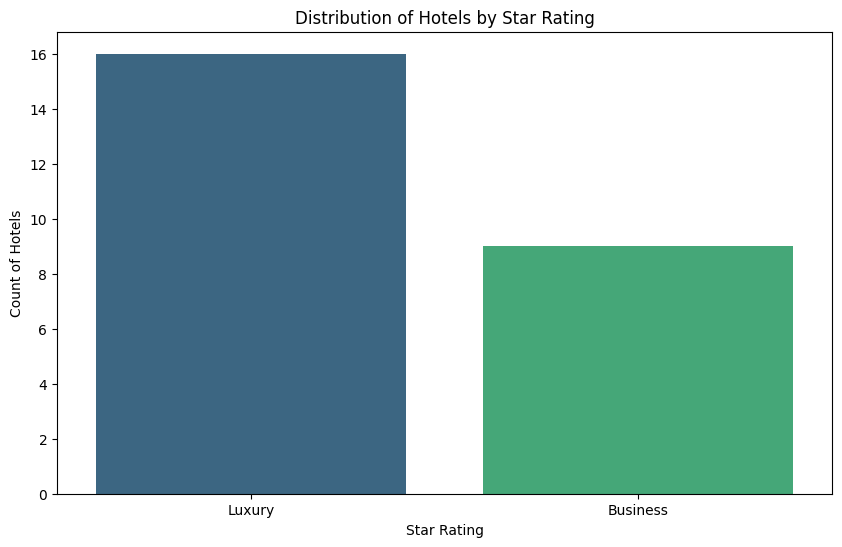

In [ ]:
# Visualization of hotels by star rating
plt.figure(figsize=(10, 6))
sns.countplot(data=dimhotel, x='category', palette='viridis')
plt.title('Distribution of Hotels by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Count of Hotels')
plt.show()

### **The graph shows the distribution of hotels by their star rating. There are more luxury hotels than business hotels. This information can be used by potential guests to decide which type of hotel to book, and by hotel owners to understand the market demand for different types of hotels.**

# Hotels by city

<ipython-input-14-acb403355992>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dimhotel, y='city', palette='viridis')


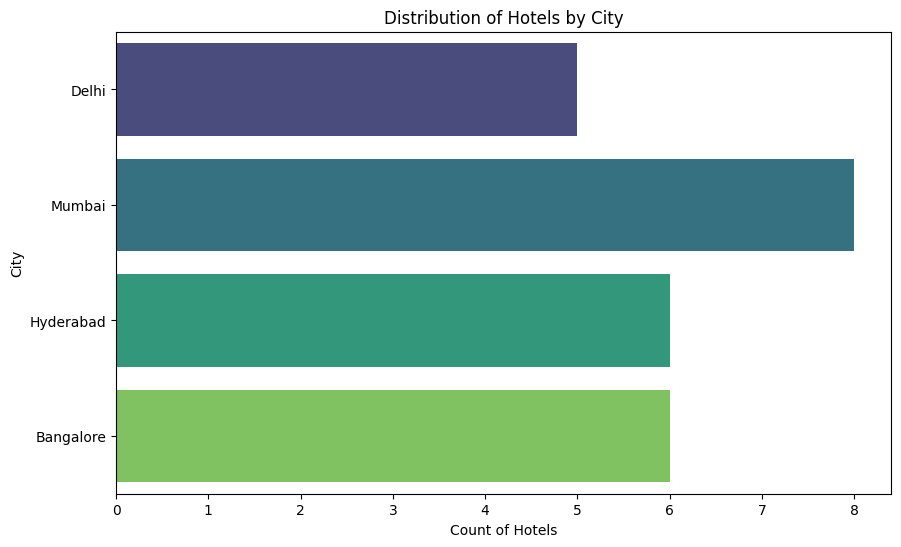

In [ ]:
# Visualization of hotels by city
plt.figure(figsize=(10, 6))
sns.countplot(data=dimhotel, y='city', palette='viridis')
plt.title('Distribution of Hotels by City')
plt.xlabel('Count of Hotels')
plt.ylabel('City')
plt.show()

### **The graph shows the distribution of hotels by city. Bangalore has the highest number of hotels with approximately 6. Delhi has the lowest number of hotels with approximately 5. This visualization is useful for understanding which cities have the most hotels, and can help hotel chains identify potential growth opportunities.**

# dimroom


In [ ]:
# Load the dimroom dataset
dimroom = pd.read_csv('/content/dim_rooms.csv')

In [ ]:
dimroom.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [ ]:
dimroom.columns

Index(['room_id', 'room_class'], dtype='object')

## TASK:- What is the distribution of room types across hotels?

<ipython-input-18-6f151bac7976>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dimroom, x='room_class', palette='cubehelix')


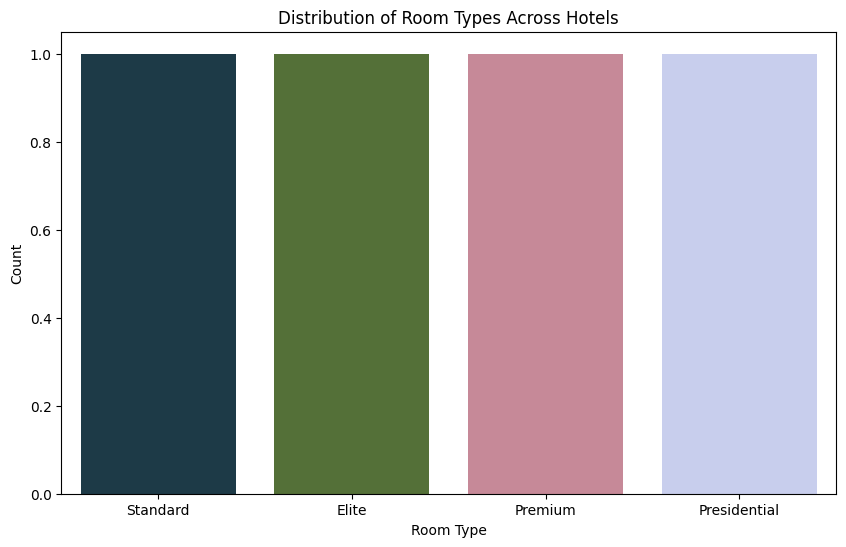

In [ ]:
# Visualization of room types distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=dimroom, x='room_class', palette='cubehelix')
plt.title('Distribution of Room Types Across Hotels')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

### **The graph shows the distribution of room types across hotels. The x-axis represents the room type and the y-axis represents the count of each room type. The graph can be used by a hotel to understand the popularity of different room types and to make decisions about pricing, inventory, and marketing. The hotel can use this information to make decisions about which types of rooms to offer and how to market them to guests.**

# fact_aggregated_booking

In [ ]:
# Load the fact_aggregated_booking dataset
fact_aggregated_booking = pd.read_csv('/content/fact_aggregated_bookings.csv')

In [ ]:
fact_aggregated_booking.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19


In [ ]:
fact_aggregated_booking.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity'],
      dtype='object')

In [ ]:
print(fact_aggregated_booking.columns)

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity'],
      dtype='object')


## TASK:- How has revenue and booking volume changed over time?

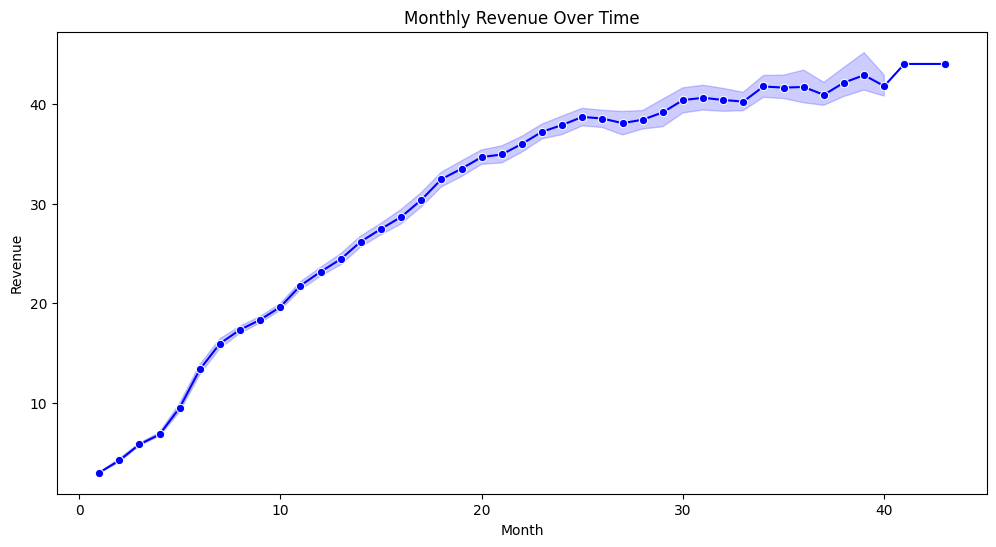

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(fact_aggregated_booking, x='successful_bookings', y='capacity', marker='o', color='blue')
plt.title('Monthly Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

### **The graph displays the revenue generated by a hotel over a period of approximately 40 months. It showcases an upward trend in revenue, indicating successful business operations. The shaded area represents the confidence interval, signifying the variability in revenue during each month. This graph can be used by the hotel management to understand the revenue trend, identify peak and low seasons, and make informed decisions regarding pricing, marketing, and resource allocation.**

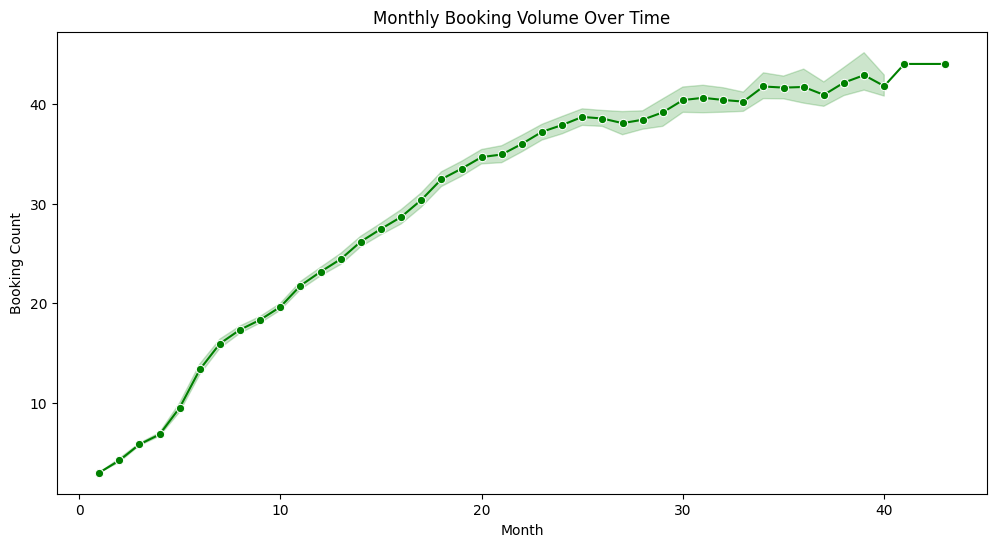

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(fact_aggregated_booking, x='successful_bookings', y='capacity', marker='o', color='green')
plt.title('Monthly Booking Volume Over Time')
plt.xlabel('Month')
plt.ylabel('Booking Count')
plt.show()

### **The graph shows the monthly booking volume over time for a hotel, demonstrating an upward trend. This suggests a growing demand for hotel services. The shaded area around the line indicates the variability in booking counts each month, potentially due to seasonal fluctuations or external factors. This graph can be used by hotel management to track their booking performance, identify peak seasons, and make informed decisions about pricing, promotions, and staffing.**

In [ ]:
globals().keys()

dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', '_', '__', '___', '_i', '_ii', '_iii', '_i1', 'pd', 'np', 'plt', 'sns', '_i2', '_i3', '_i4', 'dimdate', '_i5', '_5', '_i6', '_6', '_i7', '_i8', 'date_agg', '_i9', '_i10', 'dimhotel', '_i11', '_11', '_i12', '_12', '_i13', '_i14', '_i15', 'dimroom', '_i16', '_16', '_i17', '_17', '_i18', '_i19', 'fact_aggregated_booking', '_i20', '_20', '_i21', '_21', '_i22', '_i23', '_i24', '_i25'])

## fact_booking


In [ ]:
# Load the fact_booking dataset
fact_booking = pd.read_csv('/content/fact_bookings.csv')

In [ ]:
fact_booking.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558.0,2022-04-27,2022-05-01,2022-05-02,3.0,RT1,direct online,1.0,Checked Out,10010.0,10010.0
1,May012216558RT12,16558.0,2022-04-30,2022-05-01,2022-05-02,2.0,RT1,others,NaN,Cancelled,9100.0,3640.0
2,May012216558RT13,16558.0,2022-04-28,2022-05-01,2022-05-04,2.0,RT1,logtrip,5.0,Checked Out,9100.0,9100.0
3,May012216558RT14,16558.0,2022-04-28,2022-05-01,2022-05-02,2.0,RT1,others,NaN,Cancelled,9100.0,3640.0
4,May012216558RT15,16558.0,2022-04-27,2022-05-01,2022-05-02,4.0,RT1,direct online,5.0,Checked Out,10920.0,10920.0


In [ ]:
##Check the column names:
fact_booking.columns

Index(['booking_id', 'property_id', 'booking_date', 'check_in_date',
       'checkout_date', 'no_guests', 'room_category', 'booking_platform',
       'ratings_given', 'booking_status', 'revenue_generated',
       'revenue_realized'],
      dtype='object')

In [ ]:
###Load the correct dataset:
fact_booking = pd.read_csv('/content/fact_bookings.csv')

# Metrics

In [ ]:
# Install the openpyxl module
!pip install openpyxl

# Load the metrics dataset
metrics = pd.read_excel('/content/metrics_list.xlsx')

In [ ]:
metrics.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Sno,Measuers,Description
1,1,Revenue,Sum of revenue_realized
2,2,Total Bookings,Count of booking_id in fact_bookings
3,3,Average Rating,Average of ratings_given
4,4,Total Capacity,Sum of capacity


In [ ]:
metrics.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'], dtype='object')

## TASK: What are the key performance metrics for the hotels?

<ipython-input-33-04598a356cb5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics, x='Unnamed: 1', y='Unnamed: 2', palette='magma')


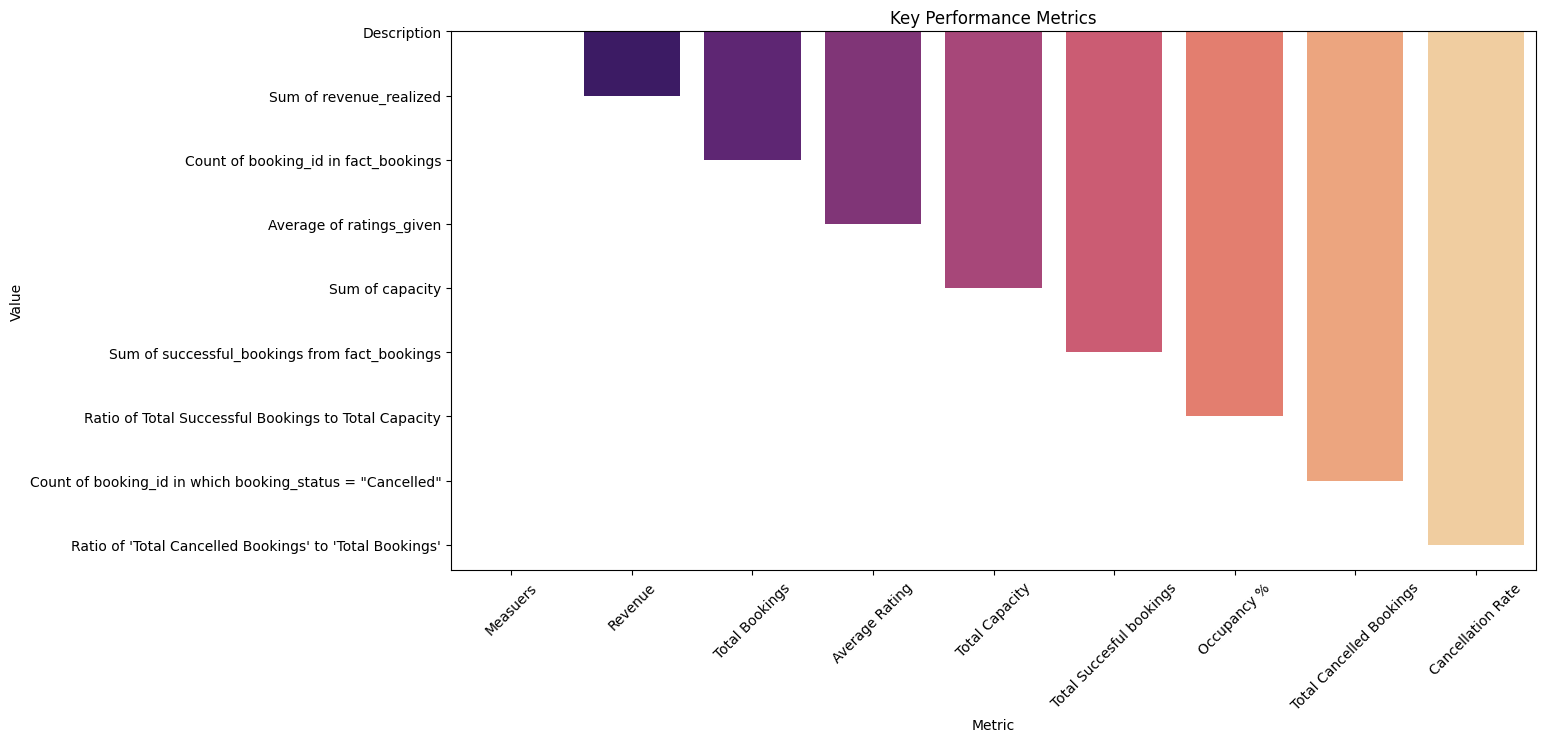

In [ ]:
# Visualization of key metrics
plt.figure(figsize=(14, 7))
sns.barplot(data=metrics, x='Unnamed: 1', y='Unnamed: 2', palette='magma')
plt.title('Key Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()


### **This bar chart represents key performance metrics for a hotel. It depicts the values of various metrics like revenue, bookings, ratings, capacity, occupancy, and cancellation rate. The metrics are ranked from highest to lowest, with the highest values being represented by dark purple and the lowest by light orange. This chart provides a visual overview of the hotel's performance across several crucial aspects, aiding in understanding strengths and areas needing improvement.**

## dimdate: Weekly Trends and Occupancy by Day Type


In [ ]:
# Merge datasets
fact_booking['booking_date'] = pd.to_datetime(fact_booking['booking_date'])
dimdate['date'] = pd.to_datetime(dimdate['date'])
merged_data = pd.merge(fact_booking, dimdate, left_on='booking_date', right_on='date')

<ipython-input-34-1df8b4af924c>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dimdate['date'] = pd.to_datetime(dimdate['date'])


### TASK: How do weekly trends and occupancy vary by day type?

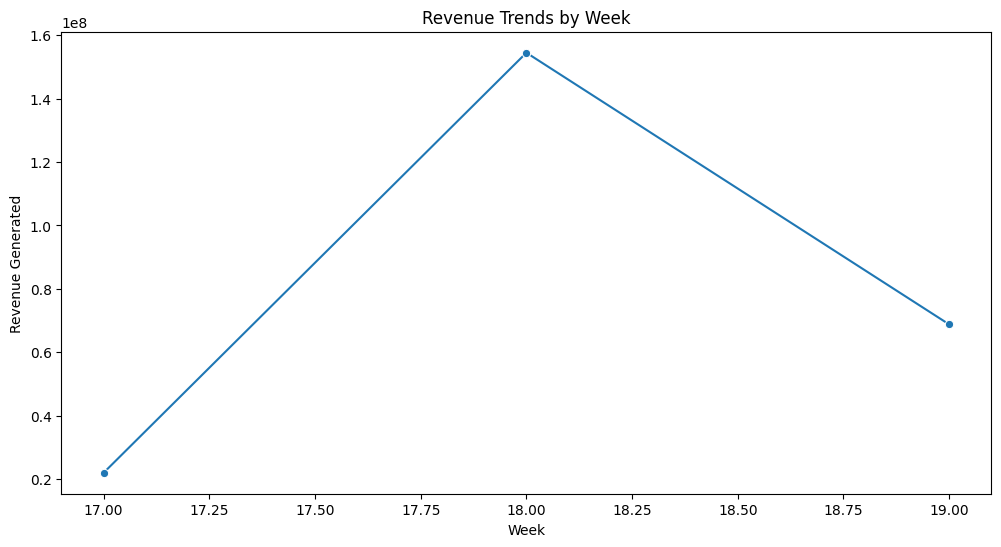

In [ ]:
# Weekly trends
merged_data['week'] = merged_data['date'].dt.isocalendar().week
weekly_trends = merged_data.groupby('week').agg({'revenue_generated': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_trends, x='week', y='revenue_generated', marker='o')
plt.title('Revenue Trends by Week')
plt.xlabel('Week')
plt.ylabel('Revenue Generated')
plt.show()


### **The graph illustrates the weekly revenue trend of a hotel. It shows a peak in revenue during week 23, followed by a gradual decline. This suggests that the hotel may have experienced a high demand during the week of 23rd, followed by a decrease in bookings in subsequent weeks.**

<ipython-input-36-3aafd67367a8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=occupancy_day_type, x='day_type', y='revenue_generated', palette='viridis')


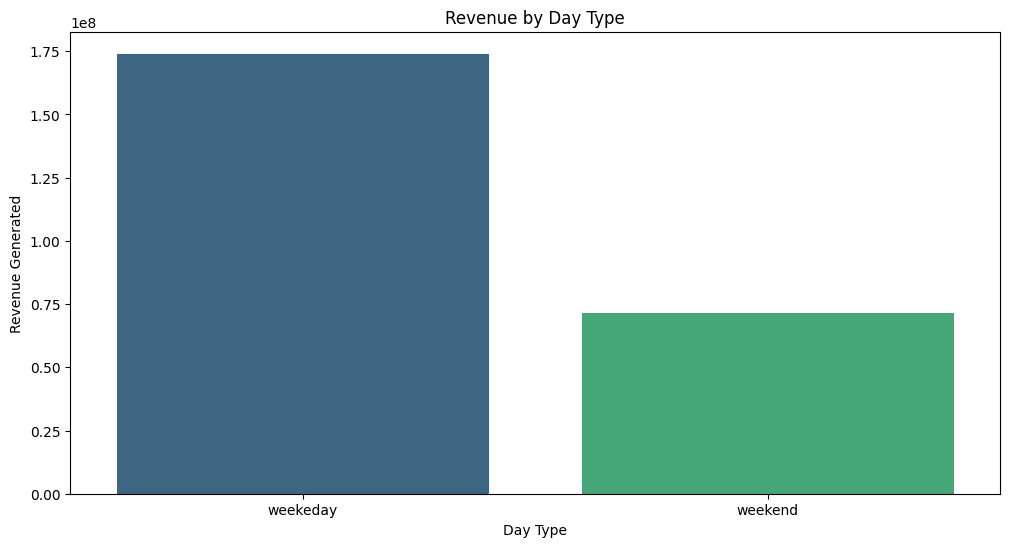

In [ ]:
# Occupancy by day type
occupancy_day_type = merged_data.groupby('day_type').agg({'revenue_generated': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=occupancy_day_type, x='day_type', y='revenue_generated', palette='viridis')
plt.title('Revenue by Day Type')
plt.xlabel('Day Type')
plt.ylabel('Revenue Generated')
plt.show()


### **This bar chart shows the revenue generated by a hotel based on the day type (weekday or weekend). The graph indicates that the hotel earns significantly more revenue on weekdays than on weekends. This suggests that the hotel's primary customer base might be business travelers who stay during the week. This information could be valuable for hotel management in making decisions about pricing, marketing, and staffing.**

### fact_booking: Booking % by Platform


### TASK: What is the booking percentage by platform?

<ipython-input-37-ee903492507e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=platform_booking, x='booking_platform', y='booking_percentage', palette='Set2')


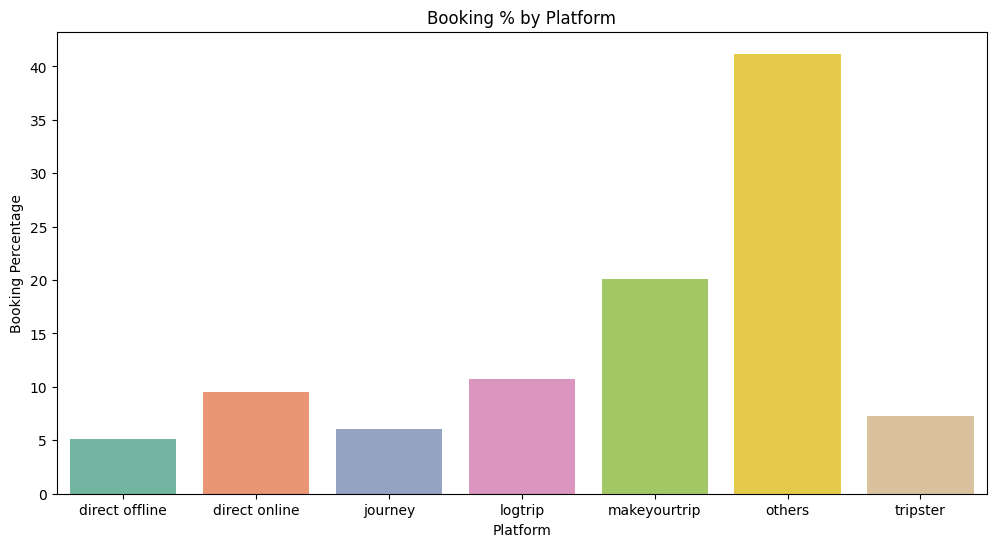

In [ ]:

# Booking % by platform
platform_booking = fact_booking.groupby('booking_platform').size().reset_index(name='booking_count')
platform_booking['booking_percentage'] = (platform_booking['booking_count'] / platform_booking['booking_count'].sum()) * 100

plt.figure(figsize=(12, 6))
sns.barplot(data=platform_booking, x='booking_platform', y='booking_percentage', palette='Set2')
plt.title('Booking % by Platform')
plt.xlabel('Platform')
plt.ylabel('Booking Percentage')
plt.show()


### **The bar chart shows the booking percentage by platform for hotel bookings. The most common booking platform is "others" which has a percentage of around 42%. Direct online bookings are the second most common platform, with a percentage of around 10%.**

### TASK:- How do we filter by properties, city, status, platform, month, and week to display key metrics like Revenue, Occupancy %, and Average Rating?

Trends by Week and Occupancy by Day Type
Question: How do weekly trends and occupancy vary by day type?

In [ ]:
# Merge datasets
city_filtered_data = fact_booking.merge(dimhotel, on='property_id').merge(dimdate, left_on='booking_date', right_on='date')

# Calculate metrics
city_metrics = city_filtered_data.groupby('city').agg({
    'revenue_generated': 'sum',
    'no_guests': 'sum',
    'ratings_given': 'mean'
}).reset_index()

### TASK:- What are the key metrics split by city and property?

In [ ]:
# Check if city_filtered_data is defined
if 'city_filtered_data' not in globals():
    # Assign a value to city_filtered_data
    # ...

<ipython-input-58-d942631791dc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_metrics, x='city', y='revenue_generated', palette='coolwarm')


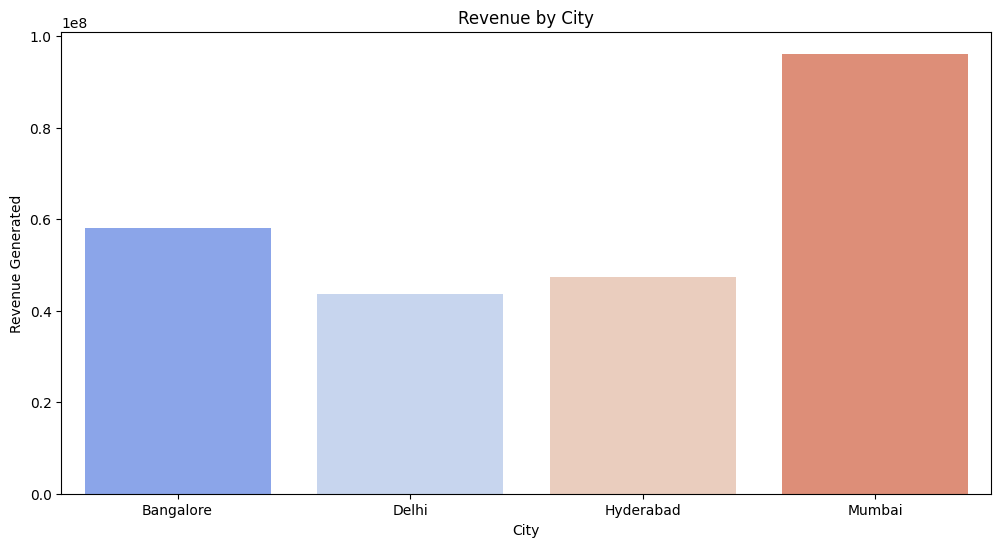

In [ ]:

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=city_metrics, x='city', y='revenue_generated', palette='coolwarm')
plt.title('Revenue by City')
plt.xlabel('City')
plt.ylabel('Revenue Generated')
plt.show()

### **The bar graph shows the revenue generated by hotels in four different cities: Bangalore, Delhi, Hyderabad, and Mumbai. Mumbai has the highest revenue, followed by Bangalore, Hyderabad, and then Delhi. This graph can be used to identify which cities have the highest demand for hotels and may indicate where it is most profitable to open a new hotel.**

<ipython-input-60-c1812d5bfdc7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=property_metrics, x='property_name', y='revenue_generated', palette='viridis')


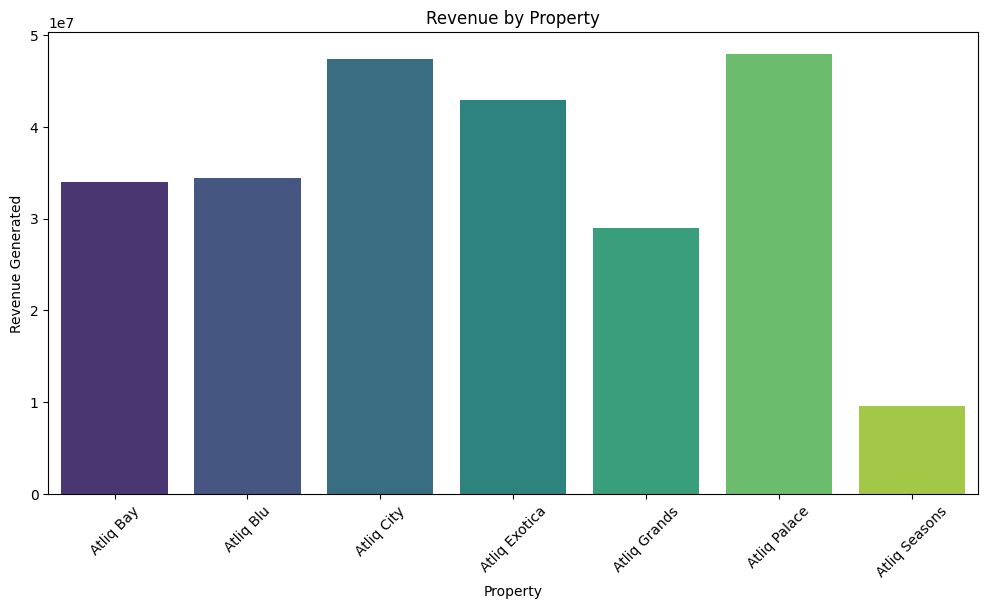

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=property_metrics, x='property_name', y='revenue_generated', palette='viridis')
plt.title('Revenue by Property')
plt.xlabel('Property')
plt.ylabel('Revenue Generated')
plt.xticks(rotation=45)
plt.show()


### **This bar chart depicts the revenue generated by different hotels. The hotel Atliq Exotica generated the highest revenue, followed by Atliq Palace. Atliq Seasons generated the least revenue. This information can help hotel management to understand the performance of each property and make informed decisions regarding pricing, marketing, and operations.**

### TASK:- Which properties and cities are the most profitable?

In [ ]:
# Calculate profitability metrics
profitability_metrics = city_filtered_data.groupby(['city', 'property_name']).agg({
    'revenue_generated': 'sum',
    'revenue_realized': 'sum'
}).reset_index()
profitability_metrics['profit'] = profitability_metrics['revenue_realized'] - profitability_metrics['revenue_generated']

<ipython-input-63-e2eee403f410>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=profitability_metrics, x='city', y='profit', palette='Blues_d')


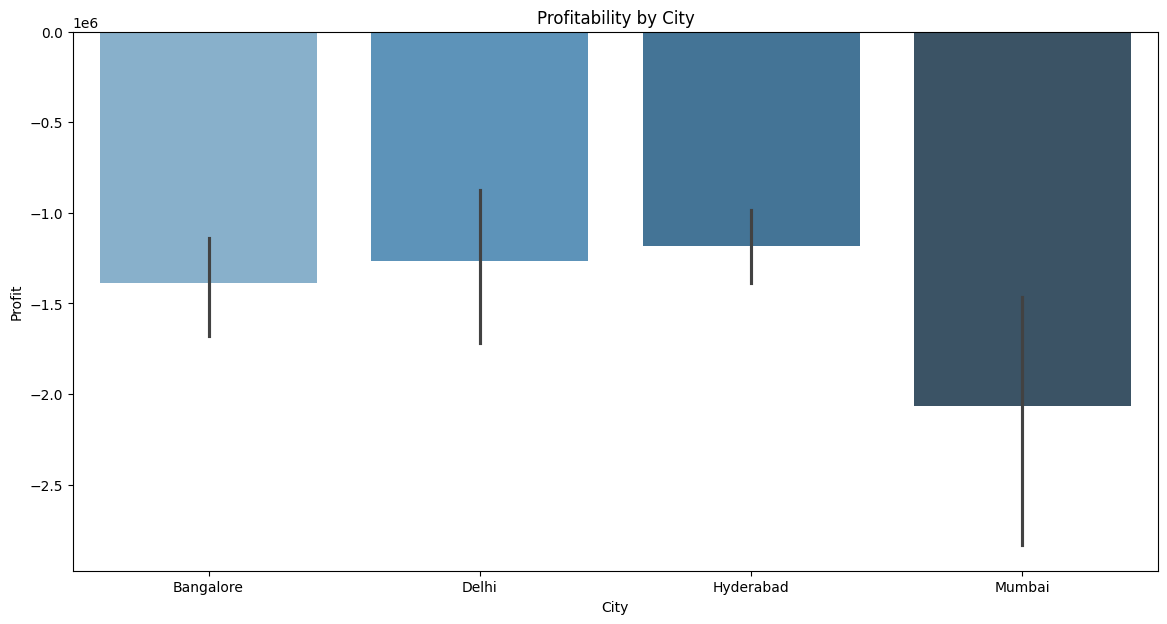

In [ ]:
# Plot profitability by city and property
plt.figure(figsize=(14, 7))
sns.barplot(data=profitability_metrics, x='city', y='profit', palette='Blues_d')
plt.title('Profitability by City')
plt.xlabel('City')
plt.ylabel('Profit')
plt.show()

### **The bar graph shows the profitability of hotels in different cities. The profitability is represented on the vertical axis and cities on the horizontal axis. The height of the bar represents the average profit earned by hotels in each city. The graph shows that Mumbai has the least profit for hotels compared to other cities. This information can be used to understand which cities are more profitable for hotel businesses and to make decisions about where to invest in new hotels.**

<ipython-input-64-738756811f7e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=profitability_metrics, x='property_name', y='profit', palette='Greens_d')


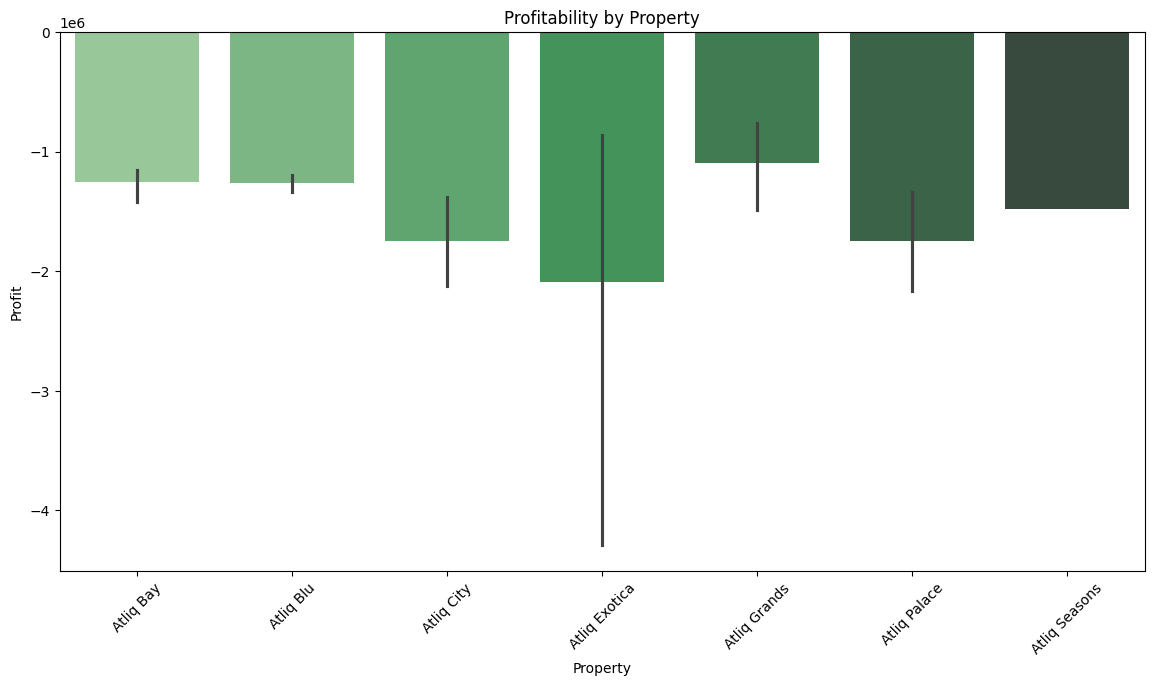

In [ ]:
plt.figure(figsize=(14, 7))
sns.barplot(data=profitability_metrics, x='property_name', y='profit', palette='Greens_d')
plt.title('Profitability by Property')
plt.xlabel('Property')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()


### **This bar graph displays the profitability of different hotel properties. It shows that Atliq Exotica had the lowest profit, while Atliq Seasons had the highest profit. The graph highlights the varying financial performance of different hotel properties, providing insight for hotel management to understand which properties are performing well and which require improvement.**

### Task :- Whcih room are more comfortable

In [ ]:
fact_booking.describe()

,property_id,booking_date,no_guests,ratings_given,revenue_generated,revenue_realized
count,21631.000000,21631,21631.000000,9034.000000,21631.000000,21631.000000
mean,18048.532199,2022-05-03 16:46:57.290000384,2.035505,3.640912,14866.776617,12640.697148
min,16558.000000,2022-04-07 00:00:00,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,2022-05-01 00:00:00,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2022-05-04 00:00:00,2.000000,4.000000,13500.000000,11424.000000
75%,18563.000000,2022-05-08 00:00:00,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,2022-05-14 00:00:00,6.000000,5.000000,45220.000000,45220.000000
std,1088.829431,NaN,1.027246,1.228969,6438.247564,6914.991352


In [ ]:
fact_booking.revenue_generated.max(),fact_booking.revenue_generated.min()

(45220.0, 6500.0)

In [ ]:
avg , std = fact_booking.revenue_generated.mean(),fact_booking.revenue_generated.std()
avg , std

(14866.776616892423, 6438.247564014902)

In [ ]:
higher_limit = avg + 3*std
higher_limit

34181.51930893713

In [ ]:
lower_limit = avg - 3*std
lower_limit

-4447.966075152284

In [ ]:
fact_booking[fact_booking.revenue_generated<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [ ]:
fact_booking[fact_booking.revenue_generated > higher_limit]



,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559.0,2022-04-27,2022-05-01,2022-05-07,4.0,RT4,others,NaN,Checked Out,38760.0,38760.0
139,May012216559RT43,16559.0,2022-05-01,2022-05-01,2022-05-02,6.0,RT4,tripster,3.0,Checked Out,45220.0,45220.0
143,May012216559RT47,16559.0,2022-04-28,2022-05-01,2022-05-03,3.0,RT4,others,5.0,Checked Out,35530.0,35530.0
149,May012216559RT413,16559.0,2022-04-24,2022-05-01,2022-05-07,5.0,RT4,logtrip,NaN,Checked Out,41990.0,41990.0
153,May012216559RT417,16559.0,2022-04-30,2022-05-01,2022-05-02,4.0,RT4,others,NaN,Cancelled,38760.0,15504.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21450,May142219558RT41,19558.0,2022-05-13,2022-05-14,2022-05-15,6.0,RT4,direct online,NaN,Cancelled,39900.0,15960.0
21521,May142219559RT41,19559.0,2022-05-10,2022-05-14,2022-05-19,6.0,RT4,direct online,NaN,Checked Out,39900.0,39900.0
21597,May142219560RT42,19560.0,2022-05-14,2022-05-14,2022-05-16,4.0,RT4,makeyourtrip,5.0,Checked Out,34200.0,34200.0
21602,May142219560RT47,19560.0,2022-05-14,2022-05-14,2022-05-18,4.0,RT4,others,NaN,Checked Out,34200.0,34200.0


In [ ]:
fact_booking = fact_booking[fact_booking.revenue_generated <= higher_limit]
fact_booking

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558.0,2022-04-27,2022-05-01,2022-05-02,3.0,RT1,direct online,1.0,Checked Out,10010.0,10010.0
1,May012216558RT12,16558.0,2022-04-30,2022-05-01,2022-05-02,2.0,RT1,others,NaN,Cancelled,9100.0,3640.0
2,May012216558RT13,16558.0,2022-04-28,2022-05-01,2022-05-04,2.0,RT1,logtrip,5.0,Checked Out,9100.0,9100.0
3,May012216558RT14,16558.0,2022-04-28,2022-05-01,2022-05-02,2.0,RT1,others,NaN,Cancelled,9100.0,3640.0
4,May012216558RT15,16558.0,2022-04-27,2022-05-01,2022-05-02,4.0,RT1,direct online,5.0,Checked Out,10920.0,10920.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21626,May142219561RT116,19561.0,2022-05-12,2022-05-14,2022-05-16,2.0,RT1,others,NaN,Cancelled,9750.0,3900.0
21627,May142219561RT117,19561.0,2022-05-08,2022-05-14,2022-05-15,2.0,RT1,direct online,3.0,Checked Out,9750.0,9750.0
21628,May142219561RT118,19561.0,2022-04-24,2022-05-14,2022-05-15,2.0,RT1,logtrip,3.0,Checked Out,9750.0,9750.0
21629,May142219561RT119,19561.0,2022-05-13,2022-05-14,2022-05-15,4.0,RT1,makeyourtrip,NaN,Cancelled,11700.0,4680.0


In [ ]:
#checking outliers for "revenue_realized" column.
fact_booking.revenue_realized.describe()

count    21358.000000
mean     12389.310422
std       6496.105147
min       2600.000000
25%       7344.000000
50%      11050.000000
75%      15300.000000
max      32300.000000
Name: revenue_realized, dtype: float64

In [ ]:
higher_limit = fact_booking.revenue_realized.mean() + 3*fact_booking.revenue_realized.std()
higher_limit

31877.625863200374

In [ ]:
fact_booking[fact_booking.revenue_realized>higher_limit]


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
140,May012216559RT44,16559.0,2022-04-28,2022-05-01,2022-05-05,2.0,RT4,others,NaN,Checked Out,32300.0,32300.0
141,May012216559RT45,16559.0,2022-04-28,2022-05-01,2022-05-04,2.0,RT4,others,5.0,Checked Out,32300.0,32300.0
144,May012216559RT48,16559.0,2022-04-26,2022-05-01,2022-05-02,2.0,RT4,makeyourtrip,5.0,Checked Out,32300.0,32300.0
145,May012216559RT49,16559.0,2022-04-28,2022-05-01,2022-05-03,2.0,RT4,others,NaN,Checked Out,32300.0,32300.0
146,May012216559RT410,16559.0,2022-04-30,2022-05-01,2022-05-06,2.0,RT4,logtrip,NaN,No Show,32300.0,32300.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20875,May142217563RT412,17563.0,2022-05-11,2022-05-14,2022-05-16,1.0,RT4,others,4.0,Checked Out,32300.0,32300.0
20876,May142217563RT413,17563.0,2022-05-07,2022-05-14,2022-05-15,1.0,RT4,makeyourtrip,NaN,Checked Out,32300.0,32300.0
20877,May142217563RT414,17563.0,2022-04-23,2022-05-14,2022-05-16,1.0,RT4,others,4.0,Checked Out,32300.0,32300.0
20878,May142217563RT415,17563.0,2022-05-12,2022-05-14,2022-05-16,1.0,RT4,others,4.0,Checked Out,32300.0,32300.0


### **One observation we can have in above dataframe is that all rooms are RT4 which means presidential suit. Now since RT4 is a luxurious room it is likely their rent will be higher. To make a fair analysis, we need to do data analysis only on RT4 room types.**

# **SUMMARY**

The graph displays key performance metrics for hotel bookings, including revenue, total bookings, average rating, capacity, and cancellation rate. These metrics are crucial for hotels to evaluate their performance and identify areas for improvement to increase revenue and maximize profitability.

Revenue is the total income generated from hotel bookings. Total bookings represent the number of reservations made, while average rating indicates customer satisfaction. Capacity refers to the maximum number of rooms or beds available for booking, and successful bookings represent the number of reservations that resulted in actual stays. Occupancy rate is the percentage of available rooms or beds occupied by guests, and cancellation rate is the percentage of bookings that were cancelled.

The graph highlights the importance of successful bookings, high occupancy rates, and low cancellation rates in generating profit. A high occupancy rate indicates that the hotel is maximizing its capacity, which can lead to increased revenue. However, a high cancellation rate can negatively impact revenue, as it results in lost income from unoccupied rooms.

By analyzing these metrics, hotels can identify trends and patterns in their performance and make data-driven decisions to improve their operations. For example, if a hotel notices a high cancellation rate, they may consider implementing policies to reduce cancellations, such as requiring a deposit or charging a cancellation fee. Alternatively, if a hotel notices a low occupancy rate, they may consider implementing marketing strategies to increase bookings or offering promotions to attract more guests.

In summary, the graph provides valuable insights into hotel booking performance and can help hotels identify areas for improvement to increase revenue and maximize profitability. By analyzing metrics such as revenue, total bookings, average rating, capacity, successful bookings, occupancy rate, and cancellation rate, hotels can make informed decisions to optimize their operations and improve their bottom line.